[494, 399.5, 415, 415, 396.5, 447, 549, 631.5, 597, 495.5, 350.5, 203, 170.5, 306.5, 496.5, 552, 443, 312.5, 279.5, 315.5, 406, 508, 542.5, 461.5, 326.5, 195, 81.5, 91, 240, 421.5, 510, 515, 447, 351.5, 265, 200.5, 171, 263.5, 510, 652, 610.5, 398.5, 197.5, 43.5, -18, 146, 380, 563.5, 467.5, 265, 131, 72.5, 98.5, 90, 97.5, 49.5, -75, -154.5, 34.5, 376.5, 558.5, 461, 139, -50, 8, 162, 170.5, -20.5, -124.5, -14.5, 198.5, 251, -23.5, -249, -138, 183, 447, 350.5, 13.5, -331, -489, -283, 75.5, 256.5, 100, -275.5, -421.5, -238, -50.5, 64.5, 134, 205.5, 184.5, 5.5, -168, -255.5, -88.5, 246.5, 309.5, 161.5, 68, 56.5, 162.5, 165.5, 32, 15.5, 181, 392.5, 328.5, 92.5, 47, 156, 394, 773.5, 1041.5, 1081.5, 789, 128.5, -412, -285.5, 228.5, 436, 432.5, 544.5, 726, 944, 1036, 897, 749.5, 761, 942, 1110, 1201, 1341, 1563, 1903.5, 2078, 1907.5, 1575, 1179.5, 858, 940.5, 1545.5, 2320, 2802.5, 2937, 2820, 2436.5, 2154, 1955, 1765.5, 1792.5, 1707.5, 1307, 921.5, 993.5, 1363.5, 1693, 1738, 1267.5, 415.5, -2

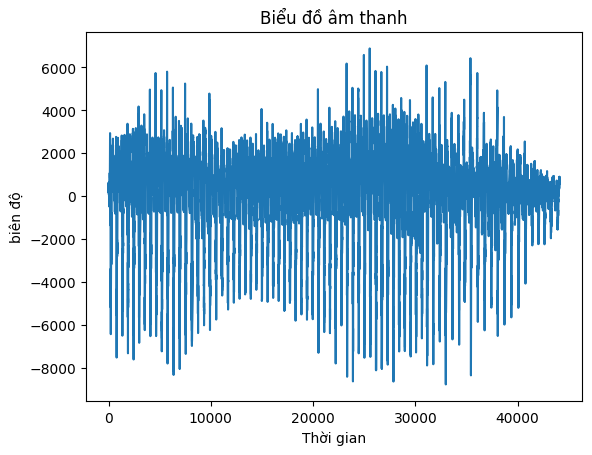

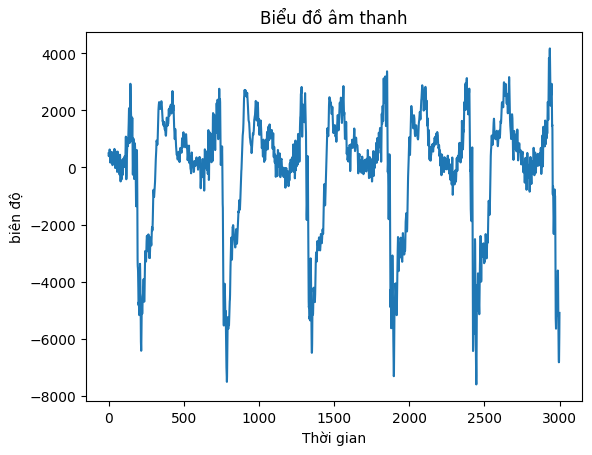

In [37]:
import json
import matplotlib.pyplot as plt
import numpy as np
# Mở file JSON
with open("./training/Snore.Thanh.WAV.44u5bgjh.ingestion-6bb4987c-vcm6n.s3.json", "r") as f:
    data = json.load(f)
  
print(data["payload"]["values"])
print(len(data["payload"]["values"]))
audio_data = data["payload"]["values"]

plt.plot(audio_data)
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()
# Lặp qua dữ liệu

plt.plot(audio_data[0:3000])
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()

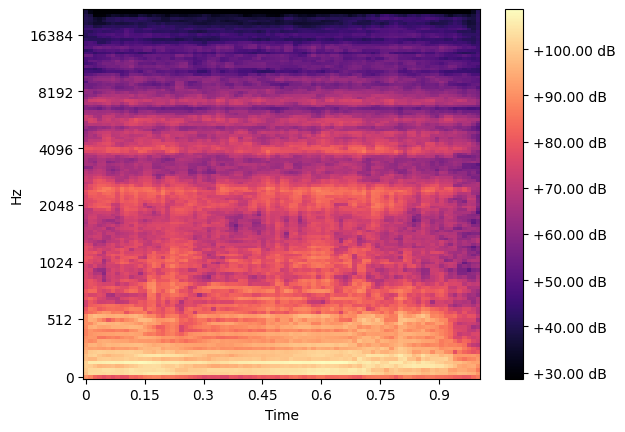

In [38]:
import librosa.display

audio_data = np.array(audio_data).astype("float")
sgram = librosa.stft(audio_data)
# librosa.display.specshow(sgram)
sgram_mag, _  = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr =44100)
# librosa.display.specshow(mel_scale_sgram)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
librosa.display.specshow(mel_sgram ,sr =44100, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')

In [39]:
import librosa
import librosa.display
import torch
import tensorflow
def calcuMelSgram(signal):
  sgram = librosa.stft(signal)  
  sgram_mag, _  = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr = 44100)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
  # t = torch.Tensor(mel_sgram)
  # t = tensorflow.convert_to_tensor(mel_sgram, dtype=tensorflow.float32)
  return mel_sgram

In [40]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./training"
train = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    print(filename)
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./training/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    train.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
  
    


info.labels
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s1.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s10.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s11.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s12.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s13.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s14.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s15.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s16.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s17.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s18.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s19.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s2.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s20.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s21.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingest

In [41]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./testing"
test = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    print(filename)
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./testing/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    test.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
    

info.labels
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s30.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s31.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s32.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s33.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s34.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s35.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s36.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s37.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s38.json
No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f645dd97-gkzmb.s39.json
No Snore.Chó sủa.WAV.48qlc0g8.ingestion-597548fbd4-cdpww.s15.json
No Snore.Chó sủa.WAV.48qlc0g8.ingestion-597548fbd4-cdpww.s16.json
No Snore.Chó sủa.WAV.48qlc0g8.ingestion-597548fbd4-cdpww.s17.json
No Snore.Chó sủa.WAV.48qlc0g8.ingestion-597548fbd4-cdpww.s18.json
No Snore.Công trùng kêu.WAV.498vjcj9.ingesti

                                       acoustic_data  label  \
0  [[76.49177744180206, 77.48526850953361, 78.608...      0   
1  [[81.28739627880182, 82.27788791489694, 77.045...      0   
2  [[67.94620383327447, 76.84824499726076, 78.114...      0   
3  [[73.78206038727575, 78.73961227393937, 81.794...      0   
4  [[76.29851211475467, 73.84067446470917, 70.712...      0   

                                            fileName  
0  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
1  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
2  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
3  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
4  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  


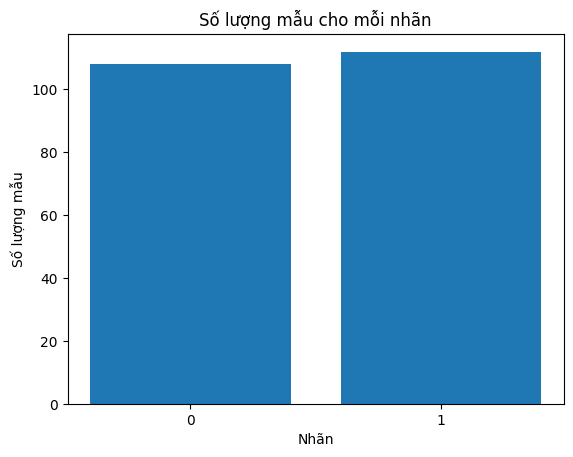

In [42]:
import pandas as pd
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)


print(train_df.head())
label_counts = test_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi nhãn')
plt.xticks([0, 1])
plt.show()

In [43]:
x_train = train_df["acoustic_data"]
y_train =train_df["label"]

x_test = test_df["acoustic_data"]
y_test = test_df["label"]


In [44]:
print(type(x_train))
print(x_train.shape)
print(x_train[0].shape)
# import tensorflow
# x_train_tf = tensorflow.convert_to_tensor(x_train, dtype=tensorflow.float32)

<class 'pandas.core.series.Series'>
(862,)
(128, 87)


In [45]:
x_train_array = np.array(x_train.tolist())

x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], 128, 87, 1)

x_train_reshaped = x_train_reshaped.astype('float32')


x_test_array = np.array(x_test.tolist())

x_test_reshaped = x_test_array.reshape(x_test_array.shape[0], 128, 87, 1)

x_test_reshaped = x_test_reshaped.astype('float32')


from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(x_train_array.shape)
print(x_test_array.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)
print(y_train_encoded)




(862, 128, 87)
(220, 128, 87)
(862, 2)
(220, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [49]:
import numpy as np
from keras.optimizers import RMSprop,Adam






# x_train_tf = np.array([data.reshape(-1, 128, 87, 1) for data in train_df["acoustic_data"]])

# x_test_tf = np.array([data.reshape(-1, 128, 87, 1) for data in test_df["acoustic_data"]])


from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,87,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


optimizer = Adam(learning_rate=0.0005, beta_1=0.95, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(x_train_reshaped, y_train_encoded, epochs=100, validation_data=(x_test_reshaped, y_test_encoded))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test accuracy:', test_acc)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 87, 8)        208       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 64, 43, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 64, 43, 8)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 43, 16)        1168      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 32, 21, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 32, 21, 16)       

In [50]:
model.save("my_model.h5")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
